In [1]:
#Spencer Fradkin
#Blockchain for Data Science Homework 2

In [2]:
pip install ipyparallel

     |████████████████████████████████| 297 kB 8.1 MB/s 


In [3]:
import hashlib
import datetime
import random
import numpy
import matplotlib
import ipyparallel
import time

In [4]:
#A blockchain is essentially an immutable chain of "blocks", each of which contain certain key attributes that store useful information, link to previous 
#blocks, and have a unique hash. This program was something I created to try to better understand the basics behind blockchain technology and how it
#can be a useful way to safely store data.

In [5]:
#Creating Block Class
class Block:
  def __init__(self, index,timestamp,data,previous_hash,nonce=0):
    self.index=index
    if timestamp==0:
      self.timestamp=datetime.datetime.now()
    else:
      self.timestamp=timestamp
    self.data=data
    self.previous_hash=previous_hash
    self.nonce=nonce
    self.hash=self.blockHash()
  
  def blockHash(self):
    long_str=(str(self.index)+str(self.timestamp)+str(self.data)+str(self.previous_hash)+str(self.nonce)).encode('utf-8')
    hash=hashlib.sha256(long_str).hexdigest()
    return hash
  

In [6]:
#Checking Work
def block_validation(index, block_time, data, previous_hash):
    new_block = Block(index, block_time, data, previous_hash)
    check_string = '260b5039394689051b599484df495d79a6a33d22a3ca37af72656d8cdfc6fcd5'
    print_statement = "This is a valid Block" if str(new_block.hash) == check_string else "Please Check your work, this is incorrect."
    print(print_statement)
    
block_time = '2022-02-13 23:59:00'
data = 'Blockchain For Data Science'
previous_hash = '9136cfeb0c77b41e1e86cb9940ca9bb65f7aca4e8e366a8ecf9226b735e0c323'
index = 1
    
block_validation(index, block_time, data, previous_hash)


This is a valid Block


In [7]:
#Creating genesis block function
def genesis_block():
  block_0=Block(index=0,timestamp=0,data='Genesis Block',previous_hash=0)
  return block_0

#Creating new block function
def next_block(Last_block):
  index=Last_block.index+1
  timestamp=0
  data=f'Block {index} generated'
  previous_hash=Last_block.hash
  new_block=Block(index=index,timestamp=timestamp,data=data,previous_hash=previous_hash)
  return new_block


In [8]:
#Running genesis block function
block_0=genesis_block()
block_0.hash

'3d555d9039e255fe97660727cd9bdc84d9c26ef6f3b27cc9eb0027c0823316f2'

In [9]:
#Creating function that creates a genesis block and stores it in a list
def create_blockchain():
  block_0=genesis_block()
  return [block_0]

def previous_block(blockchain):
  return blockchain[0]

In [10]:
#Creating function to create list of blocks that contain information about previous blocks
def complete_chain(num_blocks,blockchain,previous_block):
  for i in range(num_blocks):
    new_block=next_block(previous_block)
    blockchain.append(new_block)
    #print(blockchain)
    previous_block=new_block
    print(f'Block #{new_block.index} has been added to the blockchain')
    print(f'Hash: {new_block.hash}')
  return blockchain

In [11]:
start_chain=create_blockchain()
a=complete_chain(10,start_chain,start_chain[0])

Block #1 has been added to the blockchain
Hash: 09e03ce4ea46258a96ccab76a653be8eea0b02334df1b73930527f79e511337e
Block #2 has been added to the blockchain
Hash: 9d0d8299026145855bafc8aa9ec622af741fa588c2e24afff0e238c1263972bb
Block #3 has been added to the blockchain
Hash: ddb33845d42d4843a198da8eddad97b39c3126288756b100ec310d2403b1bbd7
Block #4 has been added to the blockchain
Hash: 629f6364111a0f58ffd97cc046b8297050b12b5c276b0b1ebeb2fbc5354c5495
Block #5 has been added to the blockchain
Hash: 15aa8cf1ec525d9ce9e92933779f1259c902b2b93a21968a9dc7362f7e44f063
Block #6 has been added to the blockchain
Hash: 8e6413eea5218a7a7f0f49c978b9cf094148711cc40adc1092b1d74bdcd9ba9f
Block #7 has been added to the blockchain
Hash: 91da3ebca5eb294d209ea57bd4cf6d639872ca52178e4a4172fdb4a92b01f1a0
Block #8 has been added to the blockchain
Hash: 7aa6bb884165ed0100b4f8d97571984033ea50135785efed00379e49bc44d220
Block #9 has been added to the blockchain
Hash: b857e4a39414bcbe2bb2fe85daf508c096f58bb88a6b2a93

In [13]:
#Defining a function to generate pseudo-random nonces
def generate_nonce(nonce_length):
  nonce=''
  for i in range(nonce_length):
    nonce=nonce+str(random.randint(0,9))
  return nonce


#Creating a function that generates a hex string with leading 0s equal to a dificulty parameter
def generate_difficulty_bound(difficulty=1):
  hex_str=''
  for i in range(difficulty):
    hex_str=hex_str+'0'

  for i in range(64-difficulty):
    hex_str=hex_str+'F'
  
  hex_str='0x'+hex_str
  return int(hex_str,base=16)


In [14]:
#Creating the function that simulates proof of work. Basically we are trying to find a hash of the current block's header that is small enough
#while varying the nonce
def find_next_block(last_block,difficulty,nonce_length):
  
  start_time=time.process_time()
  diff_bound=generate_difficulty_bound(difficulty)
  newest_block=next_block(last_block)

  hash_count=1
  while int(newest_block.hash,16)>diff_bound:
    new_nonce=generate_nonce(nonce_length)
    newest_block=Block(newest_block.index,newest_block.timestamp,newest_block.data,newest_block.previous_hash,new_nonce)
    hash_count=hash_count+1
  
  time_elapsed=time.process_time()-start_time
  
  return time_elapsed,hash_count,newest_block


In [15]:
#Creating a function to generate a proof of work blockchain by iterating through the number of blocks we want to generate and using the function created above to mine blocks
def create_blockchain(num_blocks,difficulty,blockchain,previous_block,nonce_length,broadcast=1):
  hash_arr=[]
  time_arr=[]
  for i in range(num_blocks):
    
    time_taken,hashes_tried,block_to_add=find_next_block(previous_block,difficulty,nonce_length)
    hash_arr.append(hashes_tried)
    time_arr.append(time_taken)
    blockchain.append(block_to_add)
    
    if broadcast==1:
      print(f'Block #{block_to_add.index} has been added to the chain')
      print(f'The miner took {hash_arr[i]} tries and {time_arr[i]} seconds to find a solution')
      print(f'The current block\'s hash is {block_to_add.hash}')
      
    previous_block=block_to_add

  return hash_arr,time_arr,blockchain

In [16]:
#Creating blockchain by running functions above
gen_block=genesis_block()
blockchain=[gen_block]
previous_block=blockchain[0]
num_blocks=20
difficulty=3
nonce_length=10

blockchain_pow=create_blockchain(num_blocks,difficulty,blockchain,previous_block,nonce_length)

Block #1 has been added to the chain
The miner took 1958 tries and 0.05239571700000001 seconds to find a solution
The current block's hash is 000ef2c880e231a8416119f570529f0349b325ee7053ad21bd81345628060eb6
Block #2 has been added to the chain
The miner took 4756 tries and 0.19123992099999998 seconds to find a solution
The current block's hash is 000e82e9ae21f4b707532d92510a7fe66a1a1cbcf0764af97273650d6237b3f1
Block #3 has been added to the chain
The miner took 4885 tries and 0.18285085599999995 seconds to find a solution
The current block's hash is 0000b045d0a7e7d1c2f43437e5f1cb04267e5feb344635c404b228443dd1869e
Block #4 has been added to the chain
The miner took 3779 tries and 0.11888383100000022 seconds to find a solution
The current block's hash is 000e47470cbf64fc8fbaac77a3fc03a34afe5f7208c86c17de811b243d370679
Block #5 has been added to the chain
The miner took 13833 tries and 0.36202901899999995 seconds to find a solution
The current block's hash is 000c861fc48703dfa838a795ca053

In [17]:
#Naive miner class that races with other miners to see who can get a certain number of blocks first 
class MinerNodeNaive: 
  def __init__(self, name, compute):
    self.name = name 
    self.compute = compute

  def try_hash(self, diff_value, chain):
    last_block = chain[-1]
    difficulty = generate_difficulty_bound(diff_value)
    date_now = datetime.datetime.now()
    this_index = last_block.index + 1
    this_timestamp = date_now
    this_data = "Hey! I'm block " + str(this_index)
    this_hash = last_block.hash
    new_block = Block(this_index, this_timestamp, this_data, this_hash)
    if int(new_block.hash, 16) < difficulty:
      chain.append(new_block)
      # Tell everyone about it!
      print("Block #{} has been added to the blockchain!".format(new_block.index))
      print("Block found by: {}".format(self.name))
      print("Hash: {}\n".format(new_block.hash))

#The goal of this class is to create a class that represents a miner that will try different hashes in order to find one that is
#small enough. The try hash method inside the class essentially is the way for the miner to actually go about searching for a small enough hash.
#It takes in the previous block in the chain, gets the time, data, and other necessary pieces of the block header to find a hash, and then generates a
#new block using the New Block function we defined earlier and checks to see if the hash for this block satisfies the difficulty level. If it does,
#this block is appended to the chain.

In [18]:
#Creating a list of miners that will compete with each other to mine blocks and a list of computational power for each miner
miners=[]
comp_pow=[]
for i in range(5):
  miners.append('mine'+str(i))
  comp_pow.append(random.randint(1,10))
  

In [19]:
#Creating miner objects
for i in range(len(miners)):
  miners[i]=MinerNodeNaive(miners[i],comp_pow[i])

In [22]:
#Setting up mining pools
def compute_simulation(miners):
  comp_array=[]
  for miner in miners:
    for power in range(miner.compute):
      comp_array.append(miner.name)

  return comp_array

#Creating a function to generate a list of difficulty levels to be used when generating the blockchain
difficulty_list=[]
def difficulty_list(final_chain_len):
  diff_list=[]
  for i in range(final_chain_len):
    diff_list.append(random.randint(1,3))

  return diff_list

In [23]:
#Creating a list to hold the computation power of each miner
compute_sim_arr=compute_simulation(miners)

#Creating blockchain with genesis block inside
blockchain_multi_miners=[genesis_block()]
#Creating a list of difficulty levels for each block
chain_length=20
diffs=difficulty_list(chain_length)
print(diffs)

#Creating blockchain with multiple mining pools competing to mine blocks

for i in range(len(diffs)):
  while len(blockchain_multi_miners)<i+2:
    next_str=random.sample(compute_sim_arr,1)[0]
    next_miner=0
    for miner in miners:
      if next_str==miner.name:
        next_miner=miner

    next_miner.try_hash(diffs[i],blockchain_multi_miners)


[3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 1, 3, 2, 3, 3, 2, 2, 2, 1, 3]
Block #1 has been added to the blockchain!
Block found by: mine1
Hash: 000ea70fb4cbdaa644aee44230c02a2113e5a68bd2085d7e38ba1a84e967894f

Block #2 has been added to the blockchain!
Block found by: mine1
Hash: 0036d99665d405a1fb7033a0149e3cc28b86d2db33953127701addafb38b4412

Block #3 has been added to the blockchain!
Block found by: mine1
Hash: 00026e1f3c70fccd26d122fdf21a86c526410f60655c4c9d8d17397fdccd98bd

Block #4 has been added to the blockchain!
Block found by: mine1
Hash: 000340006e765f88c2377c0395f780f916a8fa1f10eab563ff9eab1495fd43d0

Block #5 has been added to the blockchain!
Block found by: mine4
Hash: 000a7e8d021923f63d91ee8a314e7d1feb4e2aa73768ffadaf6329d889172cae

Block #6 has been added to the blockchain!
Block found by: mine1
Hash: 00f9b6b01fedee340fac864d64785f4cfb6feb741a561261e601429c27823927

Block #7 has been added to the blockchain!
Block found by: mine1
Hash: 000d537867799625097ba98ad7922d5d9c116fd034a6ad

In [29]:
#Creating multiple blockchains with different difficulty levels 1 through 5
blockchain=[genesis_block()]
prev_block=blockchain[0]
num_blocks=40
nonce_len=20
diffs=[1,2,3,4,5]

hash_arr_1,time_arr_1,bchain1=create_blockchain(num_blocks,diffs[0],blockchain,previous_block,nonce_len)
hash_arr_2,time_arr_2,bchain2=create_blockchain(num_blocks,diffs[1],blockchain,previous_block,nonce_len)
hash_arr_3,time_arr_3,bchain3=create_blockchain(num_blocks,diffs[2],blockchain,previous_block,nonce_len)
hash_arr_4,time_arr_4,bchain4=create_blockchain(num_blocks,diffs[3],blockchain,previous_block,nonce_len)
hash_arr_5,time_arr_5,bchain5=create_blockchain(num_blocks,diffs[4],blockchain,previous_block,nonce_len)

Block #1 has been added to the chain
The miner took 42 tries and 0.0028520869999937304 seconds to find a solution
The current block's hash is 07452e1be2cf69246c1392786b9d59e7d1b6e5302c18f165aead48ebaf8f8fda
Block #2 has been added to the chain
The miner took 29 tries and 0.0011968949999925371 seconds to find a solution
The current block's hash is 0a56bcb4e9a4606d5c22d2999679d6cfee9a388dabb25b45a6d28896ed87a4a0
Block #3 has been added to the chain
The miner took 12 tries and 0.00048601499999278985 seconds to find a solution
The current block's hash is 03fbcf512027f801ce18691f9319f2c8fff6cb8ac3072aa88f509ee5a907fbac
Block #4 has been added to the chain
The miner took 3 tries and 0.00012515100000598522 seconds to find a solution
The current block's hash is 02d8d6a69d3a7e4bc1b31a268ba2594f2c22cd4ad7ab5a0097b71c93cc3f2047
Block #5 has been added to the chain
The miner took 1 tries and 4.1854000002672365e-05 seconds to find a solution
The current block's hash is 0253452aa9d53f6bd1ae567c3f6d5

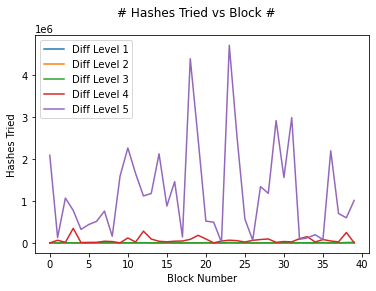

In [30]:
#All cells below involve visualizing results
import matplotlib.pyplot as plt
import numpy as np
#Plotting hashes tried per block
hash_fig=plt.figure()
hash_fig.suptitle('# Hashes Tried vs Block #')
hash_ax=plt.axes()
hash_ax.plot(hash_arr_1,label='Diff Level 1')
hash_ax.plot(hash_arr_2,label='Diff Level 2')
hash_ax.plot(hash_arr_3,label='Diff Level 3')
hash_ax.plot(hash_arr_4,label='Diff Level 4')
hash_ax.plot(hash_arr_5,label='Diff Level 5')
hash_ax.legend()
hash_ax.set_xlabel('Block Number')
hash_ax.set_ylabel('Hashes Tried')

plt.show()
#Here, we can see that the higher the difficulty level, the harder it is for a miner to find an adequate hash. This results in the miner taking more
#tries, which we can see in the plot below

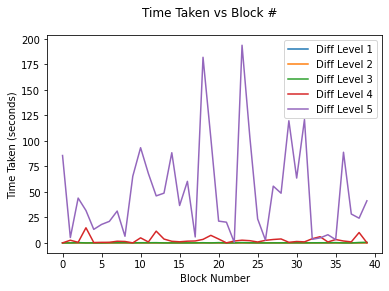

In [31]:
#Plotting time taken per block
time_fig=plt.figure()
time_fig.suptitle('Time Taken vs Block #')
time_ax=plt.axes()
time_ax.plot(time_arr_1,label='Diff Level 1')
time_ax.plot(time_arr_2,label='Diff Level 2')
time_ax.plot(time_arr_3,label='Diff Level 3')
time_ax.plot(time_arr_4,label='Diff Level 4')
time_ax.plot(time_arr_5,label='Diff Level 5')
time_ax.legend()
time_ax.set_xlabel('Block Number')
time_ax.set_ylabel('Time Taken (seconds)')
plt.show()
#Same plot as above except time on vertical axis

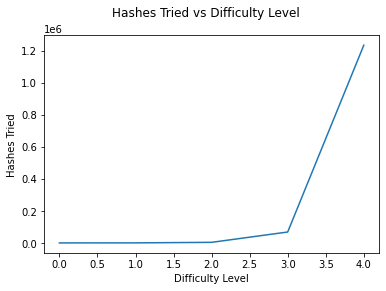

In [32]:
#More Plotting
from statistics import mean
mh_fig=plt.figure()
mh_ax=plt.axes()
mh_fig.suptitle('Hashes Tried vs Difficulty Level')
mh_ax.plot([mean(hash_arr_1),mean(hash_arr_2),mean(hash_arr_3),mean(hash_arr_4),mean(hash_arr_5)])
mh_ax.set_xlabel('Difficulty Level')
mh_ax.set_ylabel('Hashes Tried')
plt.show()
#Here, we can see a the extreme increase in hashes tried as difficulty level increases

<Figure size 432x288 with 0 Axes>

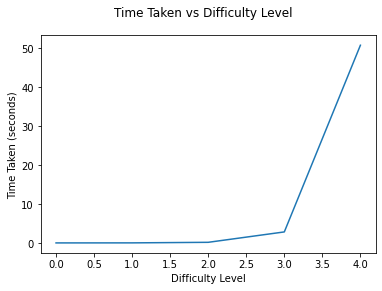

In [33]:
#Plotting average time taken per block mined as difficulty level increases
mt_fig=plt.figure()
mt_fig=plt.figure()
mt_ax=plt.axes()
mt_fig.suptitle('Time Taken vs Difficulty Level')
mt_ax.plot([mean(time_arr_1),mean(time_arr_2),mean(time_arr_3),mean(time_arr_4),mean(time_arr_5)])
mt_ax.set_xlabel('Difficulty Level')
mt_ax.set_ylabel('Time Taken (seconds)')
plt.show()
#Below is a similar plot to the one above illustrating the increase in difficulty for each difficulty level. However, here we have time on the vertical axis